In [88]:
# 📊 Overcooked PPO: Analisi e Confronto Training (Multi-run)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# ========== CONFIGURAZIONE ==========
# Inserisci qui i percorsi dei CSV delle run che vuoi confrontare.
# Puoi anche aggiungerli facilmente con un ciclo!

# log_path = "/home/gabro/Desktop/AAS/final_project/overcooked_rl/cramped_room/logs/train_log_PPO_deep_shaping-decay-15000new_setup_15000.csv"
log_path = "/home/gabro/Desktop/AAS/final_project/overcooked_rl/cramped_room/logs/train_log_PPO_deep_shaping-decay-15000new_setup_15000_full_log_2_20250524_115128.csv"
run_configs = [
    {
        "label": "Deep + Shaping + Decay",
        "path": log_path
    },
    # {
    #     "label": "Baseline + Shaping",
    #     "path": "cramped_room/logs/train_log_PPO_baseline_shaping-nodecay-12000exp1.csv"
    # },
    # Aggiungi altri run qui
    # {"label": "Nome Esperimento", "path": "percorso/al/file.csv"},
]



In [90]:
# ========== CARICA I CSV ==========
dataframes = []
for cfg in run_configs:
    if os.path.exists(cfg["path"]):
        df = pd.read_csv(cfg["path"])
        df["run_label"] = cfg["label"]
        dataframes.append(df)
    else:
        print(f"❌ File non trovato: {cfg['path']}")

if len(dataframes) == 0:
    print("Nessun file trovato, controlla i path!")
else:
    print(f"Caricati {len(dataframes)} run.")



Caricati 1 run.


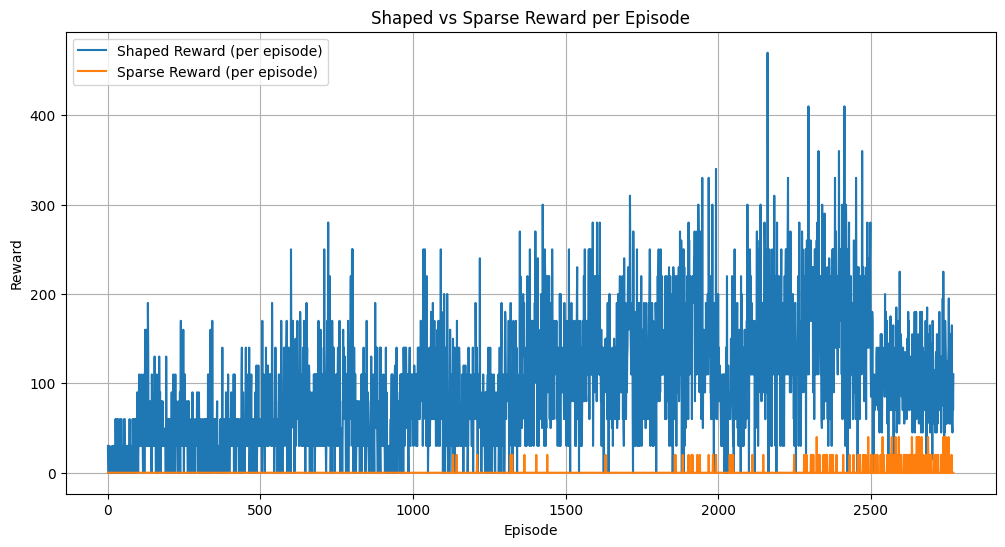

In [91]:
# --- 1. Shaped vs Sparse Reward per Episode ---
plt.figure(figsize=(12, 6))
plt.plot(df["episode"], df["total_shaped_reward"], label="Shaped Reward (per episode)")
plt.plot(df["episode"], df["total_sparse_reward"], label="Sparse Reward (per episode)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Shaped vs Sparse Reward per Episode")
plt.legend()
plt.grid(True)
plt.show()

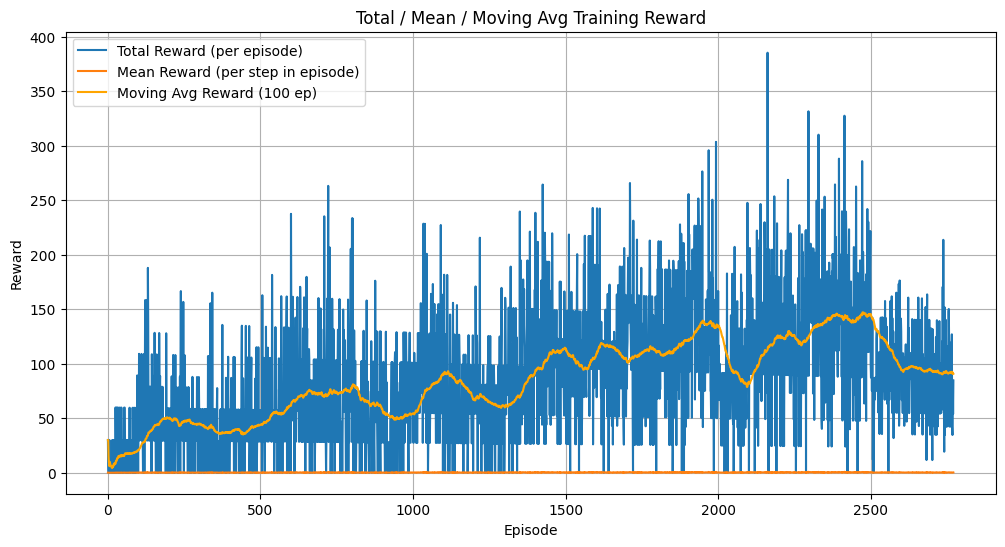

In [96]:
# --- 2. Total / Mean / Moving Avg Training Reward ---
plt.figure(figsize=(12, 6))
plt.plot(df["episode"], df["total_reward"], label="Total Reward (per episode)")
plt.plot(df["episode"], df["mean_reward"], label="Mean Reward (per step in episode)")
plt.plot(df["episode"], df["moving_avg_train_reward"], label="Moving Avg Reward (100 ep)", color="orange")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Total / Mean / Moving Avg Training Reward")
plt.legend()
plt.grid(True)
plt.show()

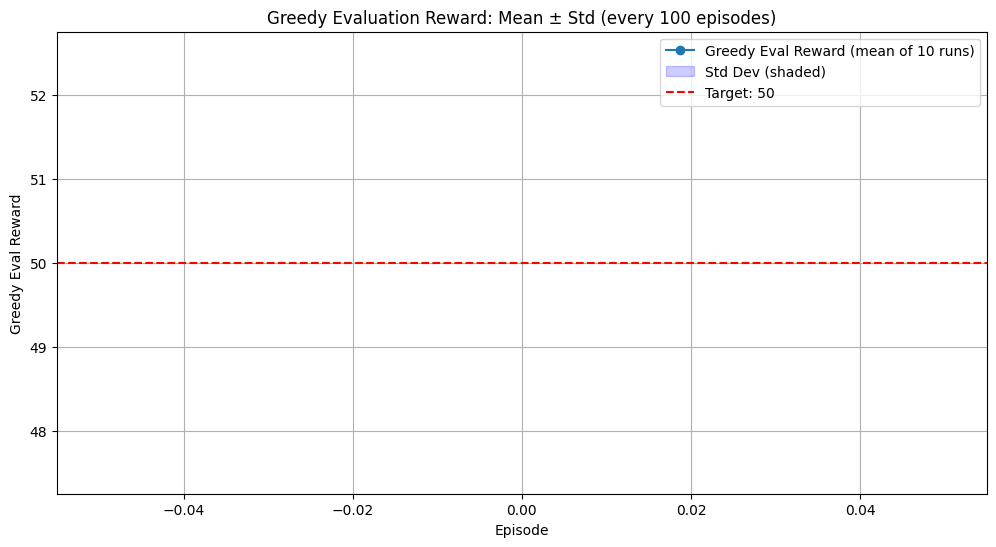

In [93]:
# --- 3. Greedy Evaluation Reward: Mean ± Std ---
if "evaluation_reward_greedy_mean" in df.columns:
    eval_mask = df["evaluation_reward_greedy_mean"] > 0
    eval_episodes = df[eval_mask]["episode"]
    eval_means = df[eval_mask]["evaluation_reward_greedy_mean"]
    eval_stds = df[eval_mask]["evaluation_reward_greedy_std"]

    plt.figure(figsize=(12, 6))
    plt.plot(eval_episodes, eval_means, marker="o", label="Greedy Eval Reward (mean of 10 runs)")
    plt.fill_between(eval_episodes, eval_means - eval_stds, eval_means + eval_stds,
                     color="b", alpha=0.2, label="Std Dev (shaded)")
    plt.axhline(50, color='red', linestyle='--', label="Target: 50")
    plt.xlabel("Episode")
    plt.ylabel("Greedy Eval Reward")
    plt.title("Greedy Evaluation Reward: Mean ± Std (every 100 episodes)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [94]:
# --- 4. Print final results summary ---
print(f"\n=== Final Episode: {df['episode'].iloc[-1]} ===")
print(f"Total reward: {df['total_reward'].iloc[-1]:.2f}")
print(f"Mean reward (per step): {df['mean_reward'].iloc[-1]:.2f}")
if "evaluation_reward_greedy_mean" in df.columns:
    print(f"Greedy eval reward (mean): {eval_means.iloc[-1]:.2f} ± {eval_stds.iloc[-1]:.2f}")


=== Final Episode: 2771 ===
Total reward: 84.60
Mean reward (per step): 0.21


IndexError: single positional indexer is out-of-bounds

In [ ]:
# --- 5. (Optional) Save plots as PNGs for your report ---
# plt.savefig("reward_shaped_vs_sparse.png", dpi=200)
# plt.savefig("training_reward_curve.png", dpi=200)
# plt.savefig("greedy_eval_mean_std.png", dpi=200)

# --- 6. (Advanced) Compare multiple runs (add more CSVs) ---
# Uncomment below to compare multiple runs (copy-paste as needed)
# """
# log_paths = [
#     ("Deep+Shaping", "cramped_room/logs/train_log_PPO_deep_shaping-decay-15000new_setup_15000.csv"),
#     ("Baseline", "cramped_room/logs/train_log_PPO_baseline_noshaping-nodecay-15000run2.csv"),
#     # ("Another run", "...")
# ]
# plt.figure(figsize=(12, 6))
# for label, path in log_paths:
#     dff = pd.read_csv(path)
#     plt.plot(dff["episode"], dff["total_reward"], label=f"{label} - Total Reward")
# plt.xlabel("Episode")
# plt.ylabel("Reward")
# plt.title("Total Reward - Multiple Runs")
# plt.legend()
# plt.grid(True)
# plt.sh

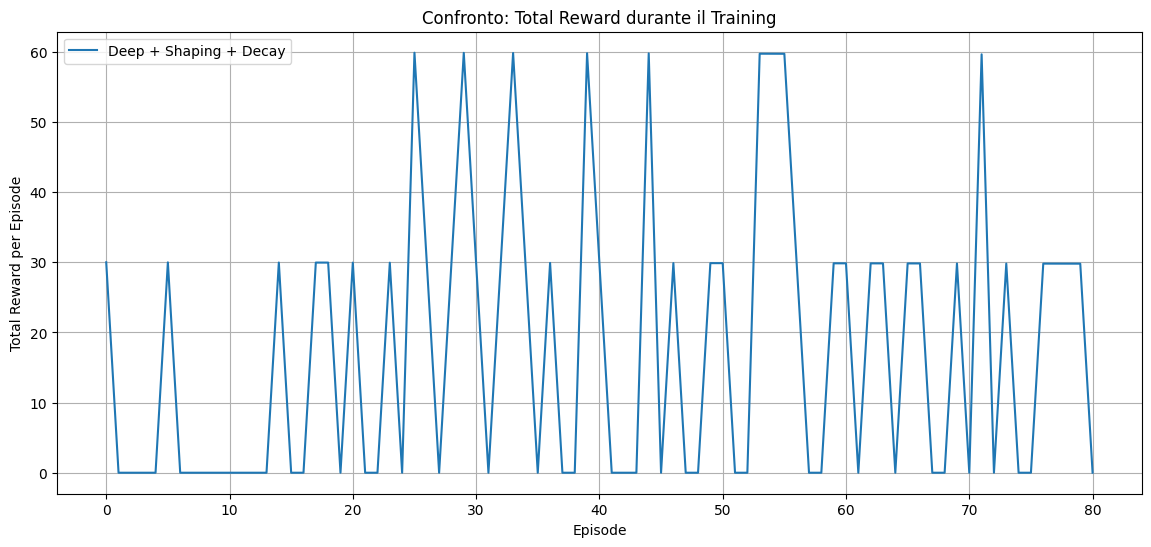

In [ ]:
# ========== GRAFICO 1: Total Reward di episodio ==========
plt.figure(figsize=(14, 6))
for df in dataframes:
    plt.plot(df["episode"], df["total_reward"], label=df["run_label"].iloc[0])
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode")
plt.title("Confronto: Total Reward durante il Training")
plt.legend()
plt.grid(True)
plt.show()


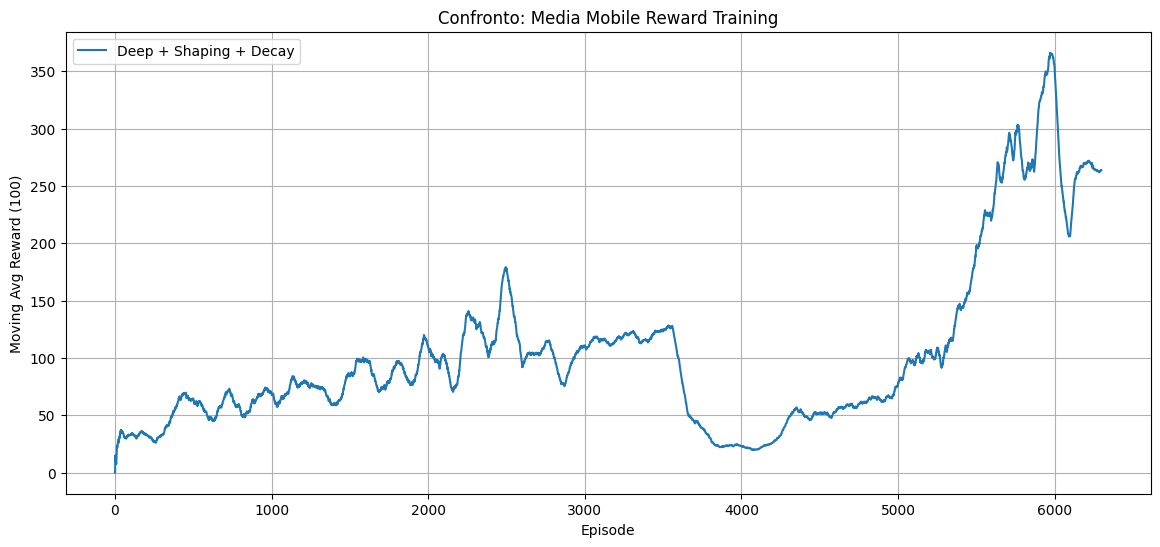

In [ ]:
# ========== GRAFICO 2: Moving Avg Reward Training ==========
plt.figure(figsize=(14, 6))
for df in dataframes:
    if "moving_avg_train_reward" in df.columns:
        plt.plot(df["episode"], df["moving_avg_train_reward"], label=df["run_label"].iloc[0])
plt.xlabel("Episode")
plt.ylabel("Moving Avg Reward (100)")
plt.title("Confronto: Media Mobile Reward Training")
plt.legend()
plt.grid(True)
plt.show()


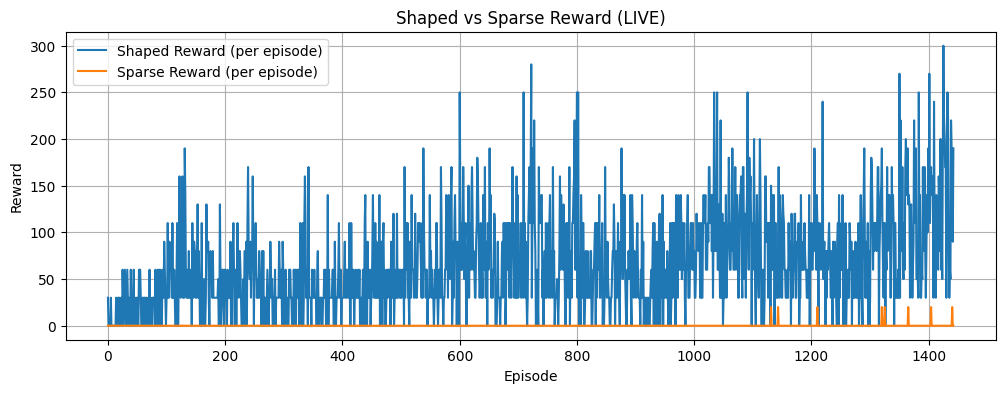

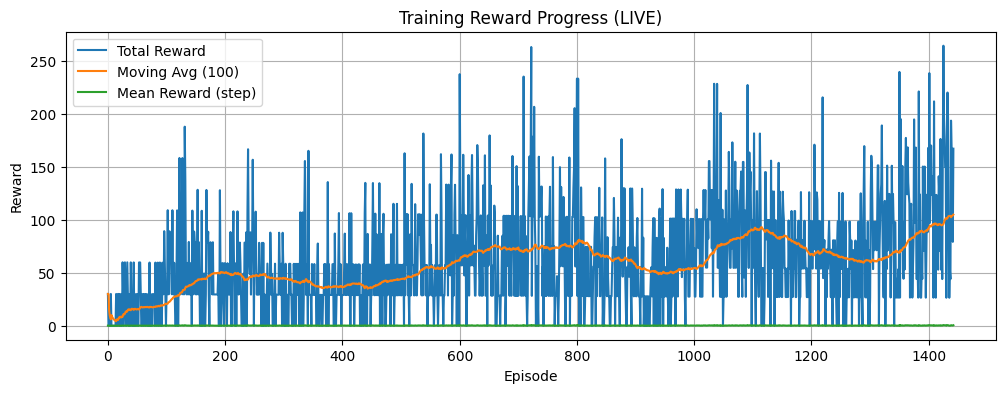

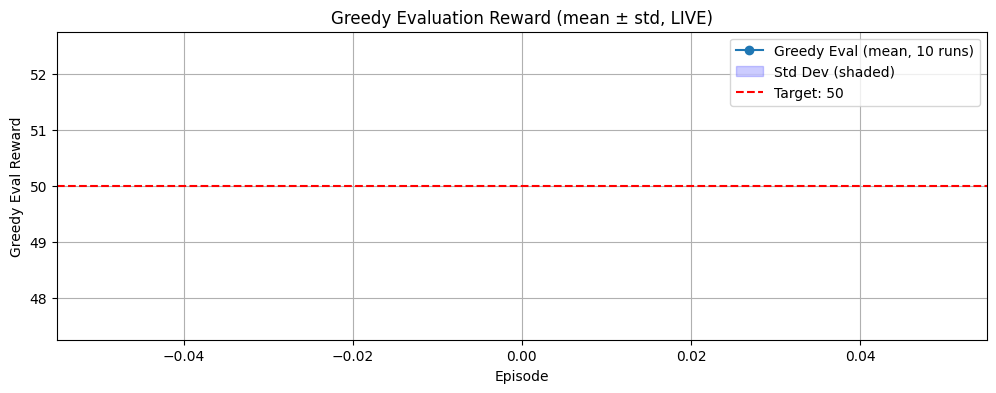

Ultimo episodio: 1442, Total reward: 167.17
Premi Interrompi/Stop quando vuoi fermare il monitoraggio live.


KeyboardInterrupt: 

In [ ]:
# Overcooked PPO - Live CSV Monitoring

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

# === Imposta l'intervallo di refresh (in secondi) ===
refresh_time = 30  # puoi cambiare

while True:
    clear_output(wait=True)
    try:
        df = pd.read_csv(log_path)
        if df.shape[0] == 0:
            print("Aspetto dati nel CSV...")
            time.sleep(refresh_time)
            continue

        # --- 1. Shaped vs Sparse Reward (totali per episodio) + moving avg ---
        plt.figure(figsize=(12, 4))
        plt.plot(df["episode"], df["total_shaped_reward"], alpha=0.4, label="Shaped Reward (per ep.)")
        plt.plot(df["episode"], df["total_sparse_reward"], alpha=0.4, label="Sparse Reward (per ep.)")
        if "moving_avg_shaped_reward" in df.columns:
            plt.plot(df["episode"], df["moving_avg_shaped_reward"], lw=2, label="Moving Avg Shaped (100)")
        if "moving_avg_sparse_reward" in df.columns:
            plt.plot(df["episode"], df["moving_avg_sparse_reward"], lw=2, label="Moving Avg Sparse (100)")
        plt.xlabel("Episode")
        plt.ylabel("Reward")
        plt.title("Shaped vs Sparse Reward (totals & moving avg, LIVE)")
        plt.legend()
        plt.grid(True)
        plt.show()

        # --- 2. Total / Mean / Moving Avg Training Reward ---
        plt.figure(figsize=(12, 4))
        plt.plot(df["episode"], df["total_reward"], label="Total Reward (ep.)")
        if "mean_reward" in df.columns:
            plt.plot(df["episode"], df["mean_reward"], label="Mean Reward (step in ep.)")
        if "moving_avg_train_reward" in df.columns:
            plt.plot(df["episode"], df["moving_avg_train_reward"], label="Moving Avg Reward (100 ep)", color="orange")
        plt.xlabel("Episode")
        plt.ylabel("Reward")
        plt.title("Total / Mean / Moving Avg Training Reward (LIVE)")
        plt.legend()
        plt.grid(True)
        plt.show()

        # --- 3. Greedy Evaluation Reward: Mean ± Std ---
        if "evaluation_reward_greedy_mean" in df.columns and "evaluation_reward_greedy_std" in df.columns:
            eval_mask = df["evaluation_reward_greedy_mean"] > 0
            eval_episodes = df[eval_mask]["episode"]
            eval_means = df[eval_mask]["evaluation_reward_greedy_mean"]
            eval_stds = df[eval_mask]["evaluation_reward_greedy_std"]
            plt.figure(figsize=(12, 4))
            plt.plot(eval_episodes, eval_means, marker="o", label="Greedy Eval (mean of 10)")
            plt.fill_between(eval_episodes, eval_means - eval_stds, eval_means + eval_stds,
                             color="b", alpha=0.2, label="Std Dev (shaded)")
            plt.axhline(50, color='red', linestyle='--', label="Target: 50")
            plt.xlabel("Episode")
            plt.ylabel("Greedy Eval Reward")
            plt.title("Greedy Evaluation Reward (mean ± std, LIVE)")
            plt.legend()
            plt.grid(True)
            plt.show()

        # --- Print summary ---
        print(f"Ultimo episodio: {df['episode'].iloc[-1]}")
        print(f"Ultima total reward: {df['total_reward'].iloc[-1]:.2f}")
        if "moving_avg_train_reward" in df.columns:
            print(f"Ultima moving avg reward: {df['moving_avg_train_reward'].iloc[-1]:.2f}")
        if "moving_avg_shaped_reward" in df.columns:
            print(f"Ultima moving avg shaped: {df['moving_avg_shaped_reward'].iloc[-1]:.2f}")
        if "moving_avg_sparse_reward" in df.columns:
            print(f"Ultima moving avg sparse: {df['moving_avg_sparse_reward'].iloc[-1]:.2f}")
        if "evaluation_reward_greedy_mean" in df.columns and len(eval_means) > 0:
            print(f"Ultima greedy eval mean: {eval_means.iloc[-1]:.2f} ± {eval_stds.iloc[-1]:.2f}")
        print("Premi Interrompi/Stop quando vuoi fermare il monitoraggio live.")

    except Exception as e:
        print(f"Attesa dati nel log... {e}")
    time.sleep(refresh_time)